In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

print(base.classes.keys())


['station', 'measurement']


/var/folders/hr/3ykqsg891cngjjlr30f5yspr0000gn/T/ipykernel_61143/3666965433.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [33]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [34]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station

print(measurements)
print(stations)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurements.date)).scalar()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


Most recent date: 2017-08-23
Date one year ago: 2016-08-23 00:00:00


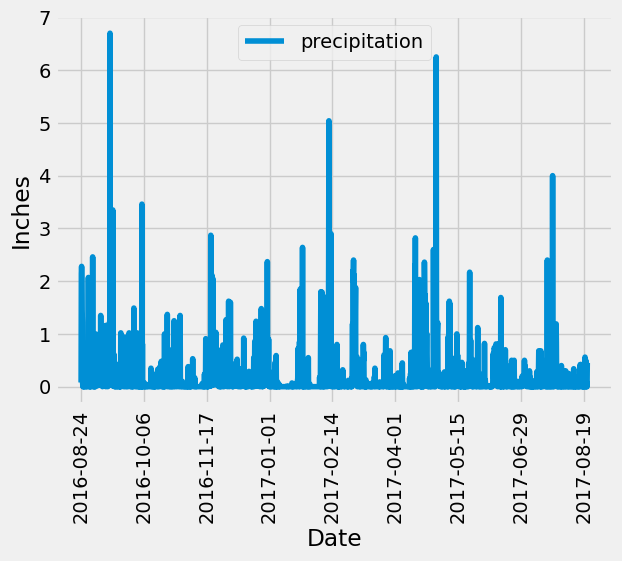

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(measurements.date)).scalar()
print(f"Most recent date: {most_recent_date}")

# Calculate the date one year from the last date in data set.
most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d")
one_year_ago = most_recent_date - timedelta(days=365)
print(f"Date one year ago: {one_year_ago}")

# Perform a query to retrieve the data and precipitation scores
results = (
    session.query(measurements.date, measurements.prcp)
    .filter(measurements.date >= one_year_ago)
    .filter(measurements.date <= most_recent_date)
    .all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(results, columns=["date", "precipitation"])

# Ensure the date column is sorted
precipitation_df = precipitation_df.sort_values("date")
precipitation_df.set_index("date", inplace=True)


# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper center')
plt.savefig("Precipitation analysis.png")
plt.show()

In [39]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(stations.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = (
    session.query(measurements.station, func.count(measurements.station))
    .group_by(measurements.station)
    .order_by(func.count(measurements.station).desc())
    .all()
)

# Display the results
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Define the most active station ID
most_active_station_id = "USC00519281"

# Query to calculate the lowest, highest, and average temperature
temperature_stats = (
    session.query(
        func.min(measurements.tobs),
        func.max(measurements.tobs),
        func.avg(measurements.tobs)
    )
    .filter(measurements.station == most_active_station_id)
    .all()
)

# Extract results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {avg_temp:.2f}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


   Temperature
0         77.0
1         80.0
2         80.0
3         75.0
4         73.0


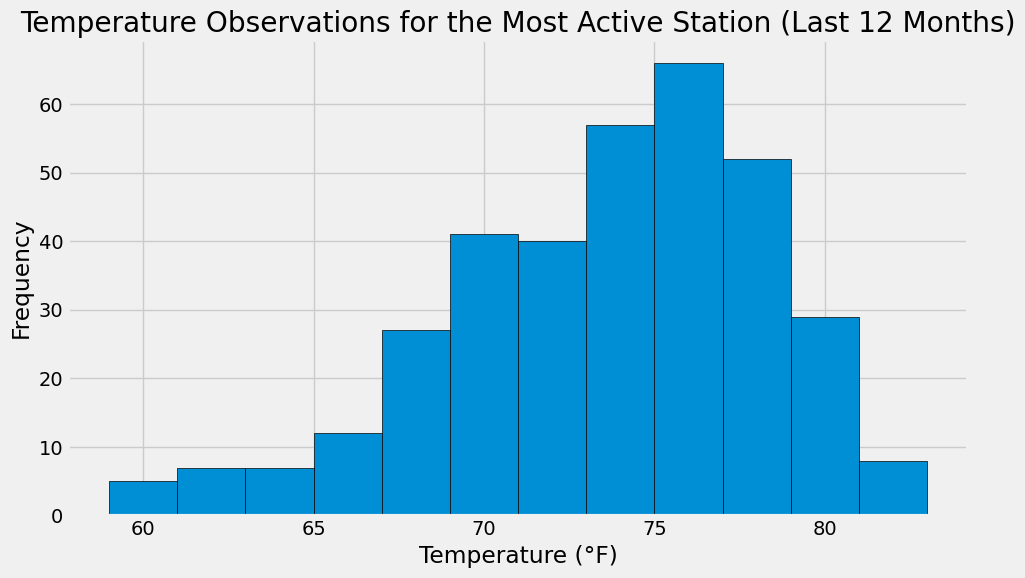

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = (
    session.query(measurements.tobs)
    .filter(measurements.station == most_active_station_id)
    .filter(measurements.date >= one_year_ago)
    .all()
)

# convert to dataframe
temperature_df = pd.DataFrame(temperature_data, columns=["Temperature"])
print(temperature_df.head())



# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(temperature_df["Temperature"], bins=12, edgecolor="black")
plt.title("Temperature Observations for the Most Active Station (Last 12 Months)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [ ]:
# Close Session

session.close()